In [1]:
import random

import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

import tengp
import symreg
from gpbenchmarks import get_data

from experiment_settings import nguyen7_funset, pagie_funset, keijzer_funset, korns12_funset, vlad_funset


In [2]:
kw_params = {'real_valued': True, 'max_back': 20}

params_nguyen4 = tengp.Parameters(2, 1, 1, 50, nguyen7_funset, **kw_params)
params_nguyen7 = tengp.Parameters(2, 1, 1, 50, nguyen7_funset, **kw_params)
params_nguyen10 = tengp.Parameters(3, 1, 1, 50, nguyen7_funset, **kw_params)
params_pagie1  = tengp.Parameters(2, 1, 1, 50, pagie_funset, **kw_params)
params_keijzer6 = tengp.Parameters(2, 1, 1, 50, keijzer_funset, **kw_params)
params_korns = tengp.Parameters(6, 1, 1, 50, korns12_funset, **kw_params)
params_vlad = tengp.Parameters(6, 1, 1, 50, vlad_funset, **kw_params)

In [3]:
import random 

data = [
    ('nguyen4', symreg.get_benchmark_poly(random, 6), params_nguyen4),
    ('nguyen7', symreg.get_benchmark_nguyen7(random, None), params_nguyen7),
    ('nguyen10', symreg.get_benchmark_nguyen10(random, None), params_nguyen10),
    ('pagie1', symreg.get_benchmark_pagie1(random, None), params_pagie1),
    ('keijzer6', symreg.get_benchmark_keijzer(random, 6), params_keijzer6),
    ('korns12', symreg.get_benchmark_korns(random, 12), params_korns),
    ('vladislasleva4', symreg.get_benchmark_vladislasleva4(random, None), params_vlad)
]

In [4]:
%%time
results = []
champions = []


for name, (x_train, y_train, x_test, y_test), params in data[5:6]:
    print(name)
    bounds = tengp.individual.IndividualBuilder(params).create().bounds[:]
    
    x_train = np.c_[x_train, np.ones(len(x_train))]
    
    problem_results = []
    random.seed(42)
    for i in range(100):
        print(i, end=',')
        
        res = tengp.simple_es(x_train, y_train, mean_squared_error, params, mutation='single', evaluations=10000)
               
        problem_results.append(res[0].fitness)
    print(name, np.min(problem_results), np.median(problem_results))
    results.append(problem_results)

korns12
0,

/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:35: RuntimeWarning: invalid value encountered in sqrt
  return  np.sqrt(x)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:11: RuntimeWarning: invalid value encountered in greater
  return np.log(x, out=np.copy(x), where=x>0)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return np.divide(x, y, out=np.copy(x), where=x!=0)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:110: RuntimeWarning: invalid value encountered in multiply
  u = a*f_u(L, U)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:38: RuntimeWarning: overflow encountered in exp
  return np.exp(x)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:132: RuntimeWarning: overflow encountered in multiply
  value = (1-coeff)*self.nodes[lower].value + coeff*self.nodes[upper

1,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:109: RuntimeWarning: overflow encountered in add
  l = (1-a)*f_l(L, U)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:110: RuntimeWarning: overflow encountered in add
  u = a*f_u(L, U)


2,3,4,5,6,

KeyboardInterrupt: 

In [8]:
def plot_results(name, outs):
    print(name)
    costs = np.array(outs)
    print('min:', np.min(costs))
    print('mean:', np.mean(costs))
    print('median:', np.median(costs))
    print('variance:',np.var(costs))
    plt.figure()
    plt.title(name)
    sns.distplot(costs, kde=False);
    

korns12
min: 1.1269675387199125
mean: 1.1386075403113827
median: 1.1283975121160827
variance: 0.009446258572244763
vladislasleva4
min: 0.022676527566055045
mean: 0.03763445802119918
median: 0.03788576900681401
variance: 1.8416448736671896e-05


/home/jarino/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


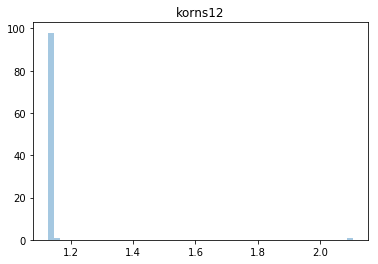

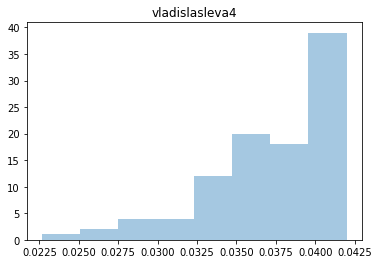

In [16]:
%matplotlib inline

for d, result in zip(data[5:], results):
    plot_results(d[0], result)

In [14]:
np.array(list(zip(res[0].bounds[0], res[0].genes, res[0].bounds[1])))

array([[ 0,  7, 12],
       [ 0,  3,  5],
       [ 0,  5,  5],
       [ 0,  1, 12],
       [ 0,  4,  6],
       [ 0,  2,  6],
       [ 0,  5, 12],
       [ 0,  6,  7],
       [ 0,  1,  7],
       [ 0,  4, 12],
       [ 0,  2,  8],
       [ 0,  5,  8],
       [ 0,  1, 12],
       [ 0,  0,  9],
       [ 0,  9,  9],
       [ 0,  1, 12],
       [ 0,  6, 10],
       [ 0,  0, 10],
       [ 0,  2, 12],
       [ 0,  7, 11],
       [ 0,  2, 11],
       [ 0, 12, 12],
       [ 0, 12, 12],
       [ 0,  6, 12],
       [ 0,  6, 12],
       [ 0,  0, 13],
       [ 0, 13, 13],
       [ 0,  5, 12],
       [ 0,  3, 14],
       [ 0,  2, 14],
       [ 0,  0, 12],
       [ 0, 14, 15],
       [ 0, 11, 15],
       [ 0,  8, 12],
       [ 0,  7, 16],
       [ 0,  2, 16],
       [ 0,  3, 12],
       [ 0, 12, 17],
       [ 0,  9, 17],
       [ 0,  8, 12],
       [ 0,  8, 18],
       [ 0,  2, 18],
       [ 0,  6, 12],
       [ 0,  5, 19],
       [ 0,  1, 19],
       [ 0,  4, 12],
       [ 1, 20, 20],
       [ 1, 1